In [1]:
import numpy as np
import pandas as pd
from io import StringIO

## Simple Example

In [9]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [10]:
df

,yesterday,temp,today
0,no rain,80,rain
1,no rain,80,rain
2,no rain,80,no rain
3,rain,81,rain
4,rain,81,rain
5,rain,83,rain
6,rain,86,no rain
7,no rain,89,rain
8,rain,89,rain
9,no rain,89,no rain


In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['temp']], df.today

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [13]:
tree.score(X, y)

0.8

In [15]:
print(export_text(tree))

|--- feature_0 <= 84.50
|   |--- feature_0 <= 80.50
|   |   |--- class: rain
|   |--- feature_0 >  80.50
|   |   |--- class: rain
|--- feature_0 >  84.50
|   |--- feature_0 <= 87.50
|   |   |--- class: no rain
|   |--- feature_0 >  87.50
|   |   |--- class: rain



In [16]:
print(export_text(tree, feature_names=X.columns.tolist())) # tell it what features are

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- class: rain
|   |--- temp >  80.50
|   |   |--- class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- class: no rain
|   |--- temp >  87.50
|   |   |--- class: rain



In [20]:
print(export_text(tree, feature_names=X.columns.tolist(), show_weights=True))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- weights: [1.00, 2.00] class: rain
|   |--- temp >  80.50
|   |   |--- weights: [0.00, 3.00] class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- weights: [1.00, 0.00] class: no rain
|   |--- temp >  87.50
|   |   |--- weights: [1.00, 2.00] class: rain



'|--- temp <= 84.50\n|   |--- temp <= 80.50\n|   |   |--- weights: [1.00, 2.00] class: rain\n|   |--- temp >  80.50\n|   |   |--- weights: [0.00, 3.00] class: rain\n|--- temp >  84.50\n|   |--- temp <= 87.50\n|   |   |--- weights: [1.00, 0.00] class: no rain\n|   |--- temp >  87.50\n|   |   |--- weights: [1.00, 2.00] class: rain\n'

[Text(167.4, 181.2, 'temp <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = rain'),
 Text(83.7, 108.72, 'temp <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = rain'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = rain'),
 Text(251.10000000000002, 108.72, 'temp <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no rain'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no rain'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain')]

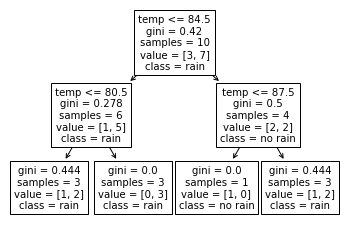

In [23]:
plot_tree(tree, feature_names=X.columns.tolist(), class_names=sorted(y.unique()))

In [24]:
plot_tree

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)>

## Titanic Example

In [25]:
import acquire
import prepare

train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

/Users/desireemcelroy/codeup-data-science/classification-exercises/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [26]:
X_cols = ['pclass', 'alone', 'Q', 'S']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [28]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 71.43%
validate score: 71.03%


[Text(798.3692307692309, 597.96, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(463.5692307692308, 489.24, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(257.53846153846155, 380.52000000000004, 'pclass <= 1.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(154.52307692307693, 271.8, 'Q <= 0.5\ngini = 0.383\nsamples = 62\nvalue = [16, 46]\nclass = survived'),
 Text(103.01538461538462, 163.07999999999998, 'S <= 0.5\ngini = 0.375\nsamples = 60\nvalue = [15, 45]\nclass = survived'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = survived'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.368\nsamples = 37\nvalue = [9, 28]\nclass = survived'),
 Text(206.03076923076924, 163.07999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = died'),
 Text(360.55384615384617, 271.8, 'S <= 0.5\ngini = 0.457\nsamples = 48\nvalue = [

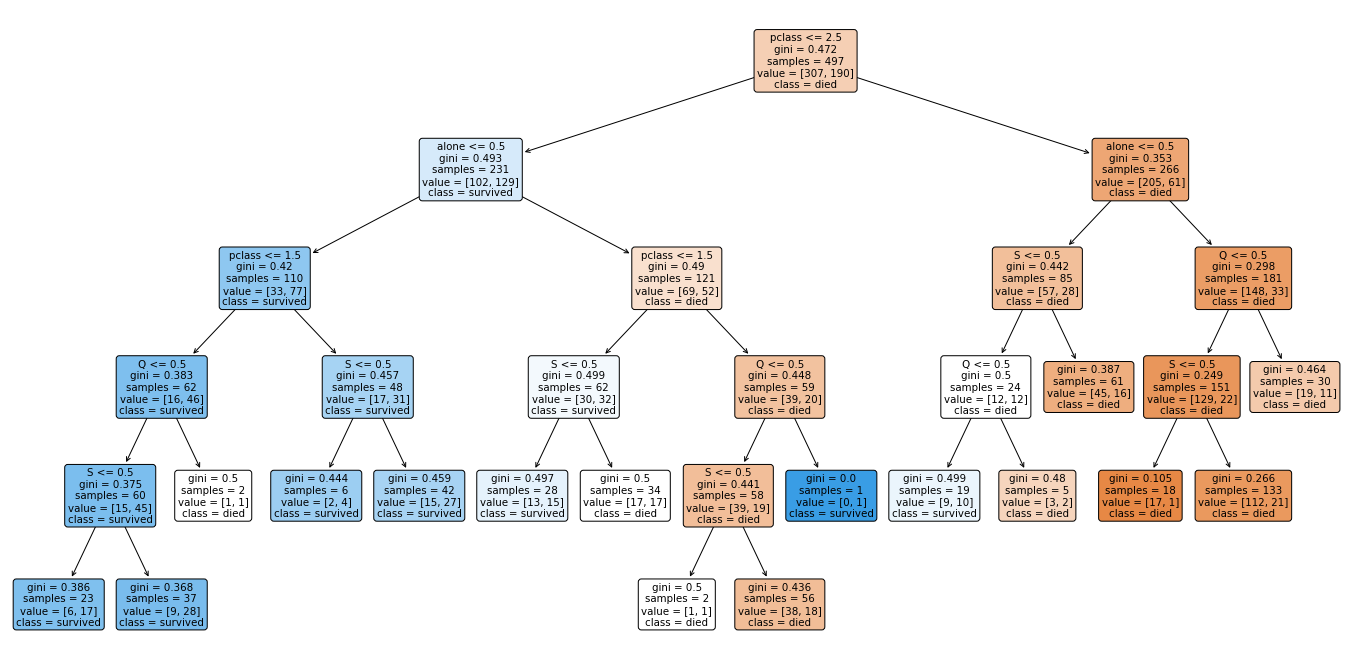

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(model1, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)

In [36]:
# TODO: interpret + visualize model
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

plt.figure(figsize=(6, 10))



<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

In [42]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass    0.630845
alone     0.236053
Q         0.080017
S         0.053086
dtype: float64

<AxesSubplot:ylabel='Feature_Importance'>

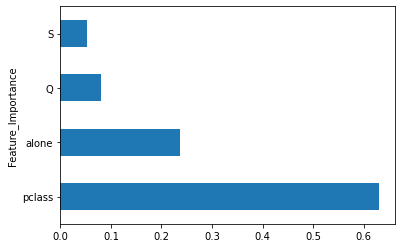

In [43]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature_Importance')

In [ ]:
# TODO: create additional models